#### 聚类思想===>无监督学习(层次聚类,k均值聚类)

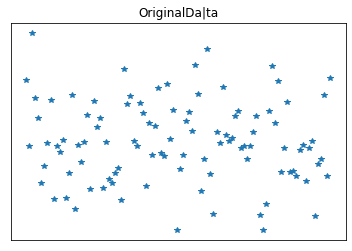

In [1]:
import numpy as np
import matplotlib.pyplot as plt
###层次聚类------->聚合聚类
ydata = np.random.normal(0,1,100)
xdata = np.arange(1,101)
plt.plot(xdata,ydata,'*')
plt.yticks([])
plt.xticks([])
plt.title("OriginalDa|ta")
plt.show()

In [2]:
#计算均值,找出初始聚类中心点，然后进行拆解
ymeanK = np.mean(ydata)
xmeanK = np.mean(xdata)
center = [xmeanK,ymeanK]
OtherClass=[[],[]]
def spilt(data,center):
    x,y = data
    maxindex = np.argmax((x-center[0])**2+(y-center[1])**2)
    otherClass = [x[maxindex],y[maxindex]]
    x=np.delete(x,maxindex)
    y=np.delete(y,maxindex)  
    center = [np.mean(x),np.mean(y)]
    return [x,y],otherClass,center
data = [xdata,ydata]

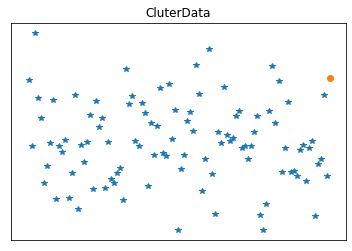

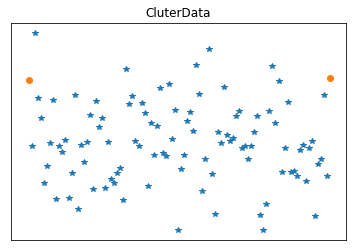

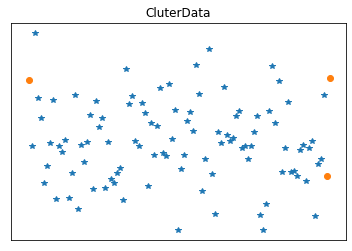

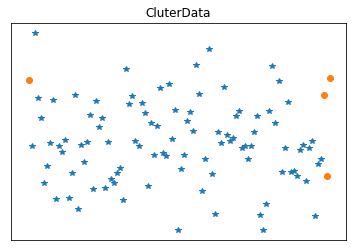

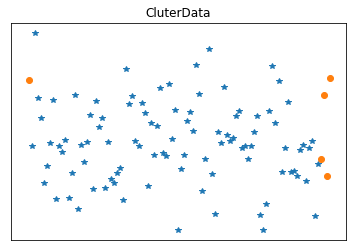

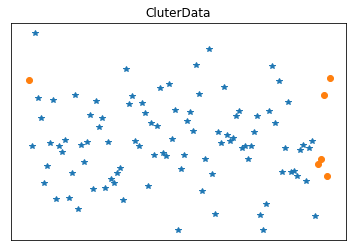

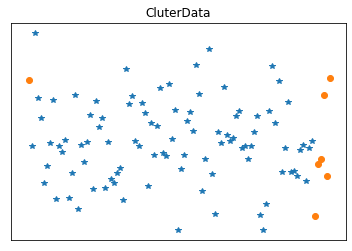

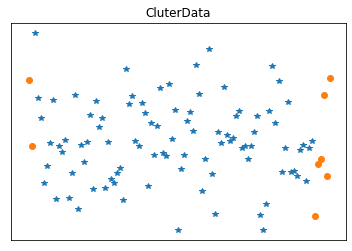

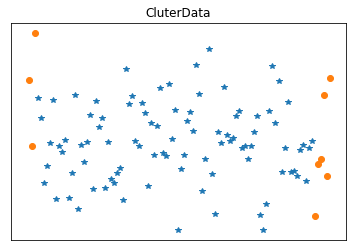

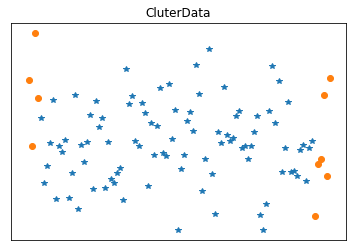

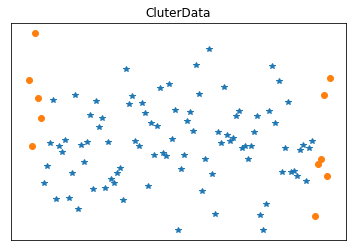

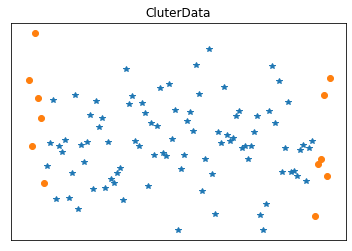

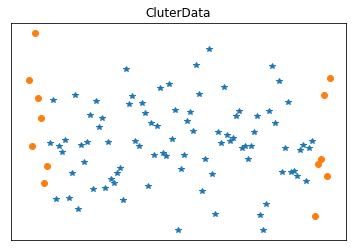

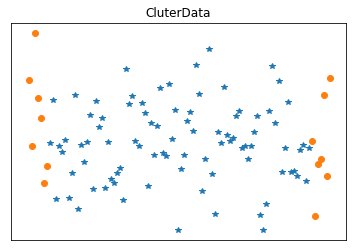

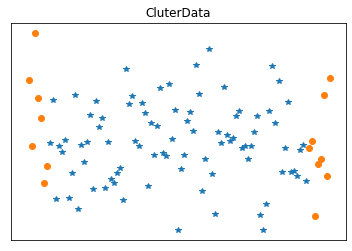

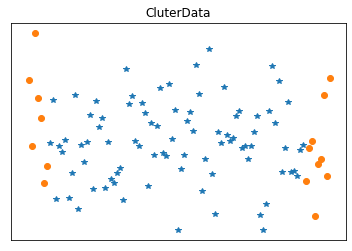

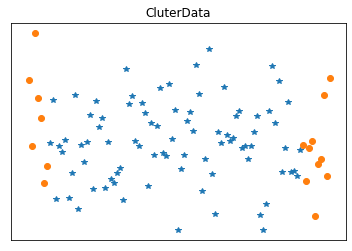

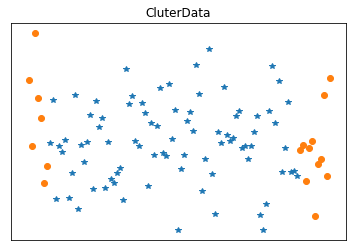

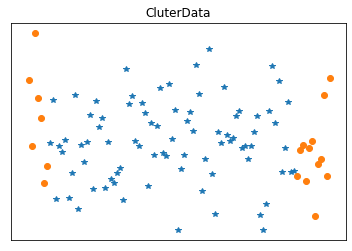

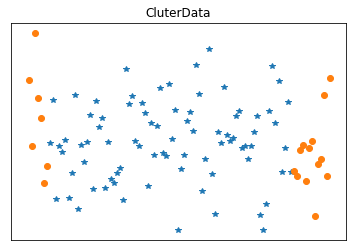

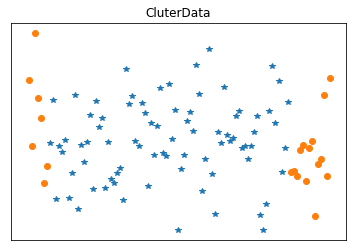

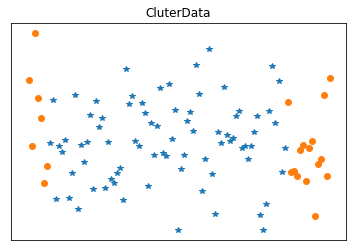

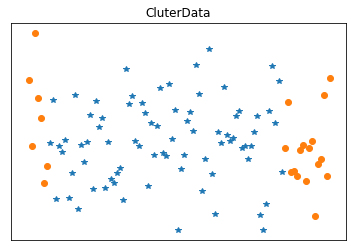

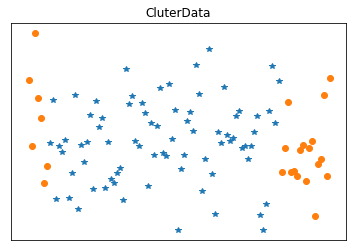

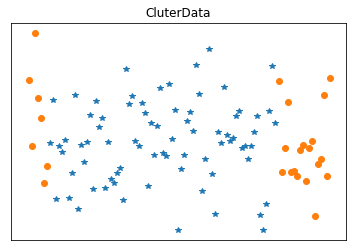

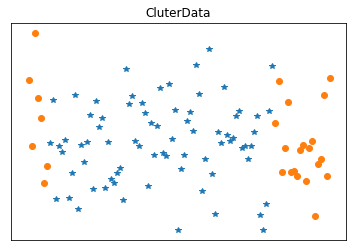

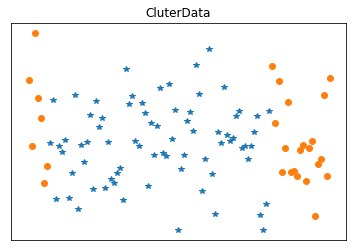

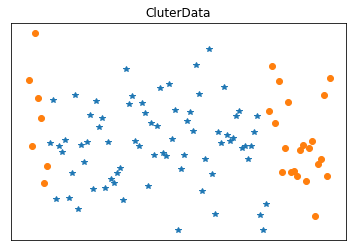

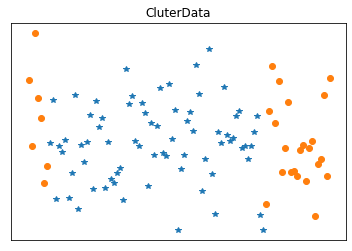

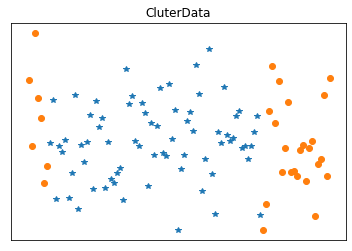

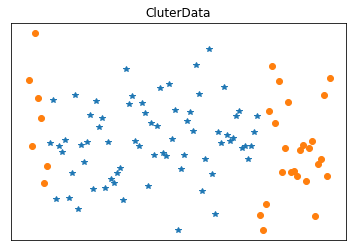

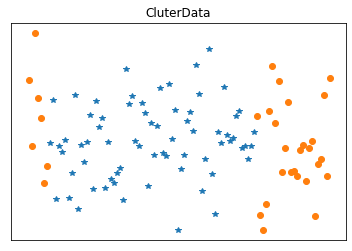

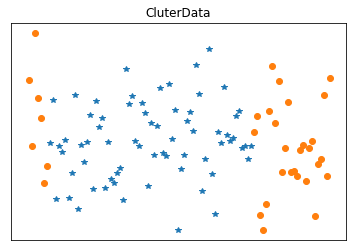

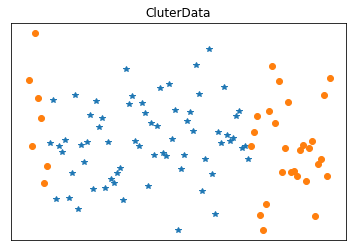

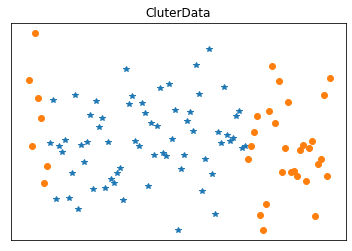

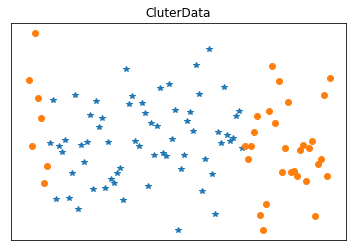

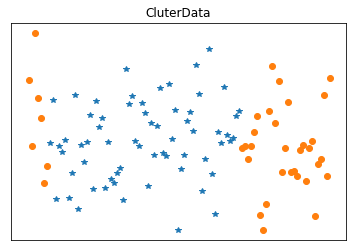

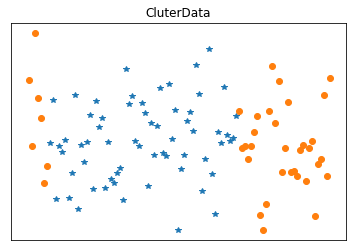

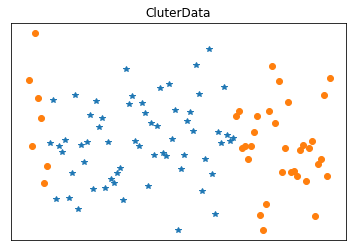

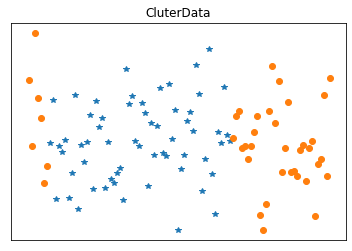

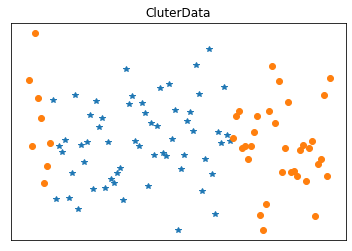

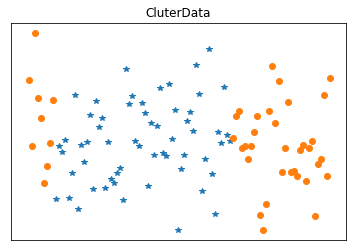

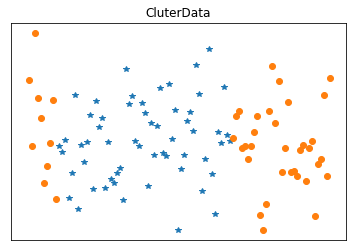

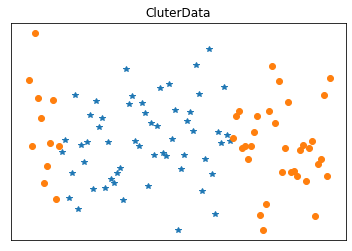

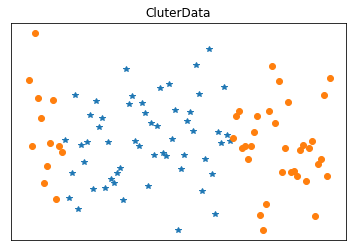

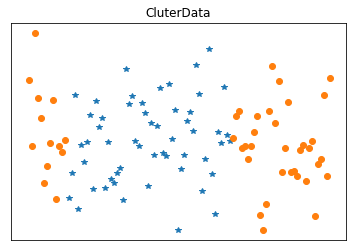

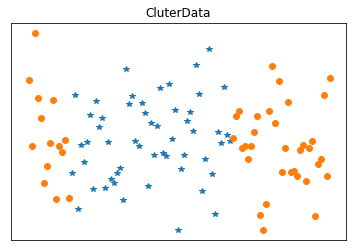

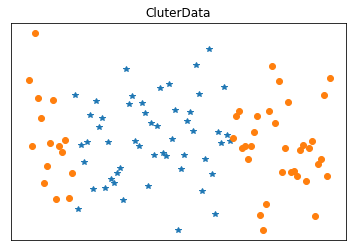

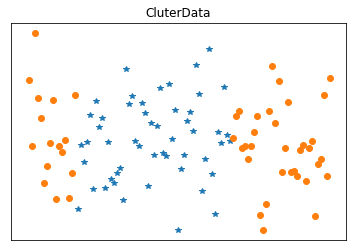

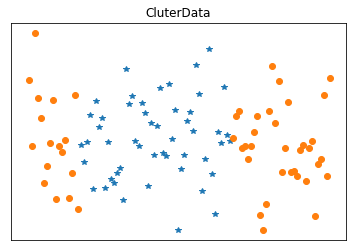

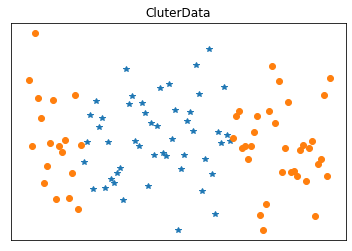

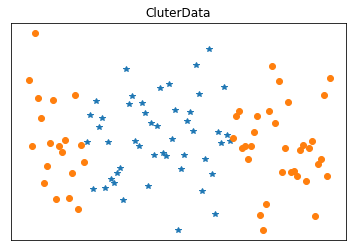

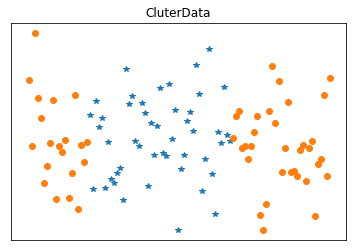

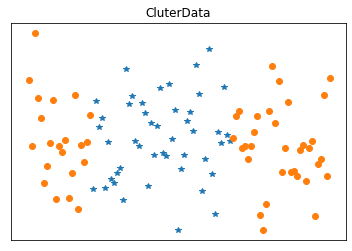

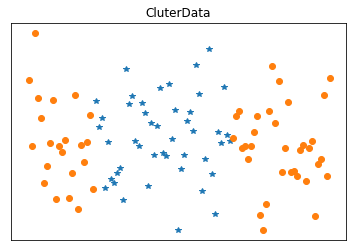

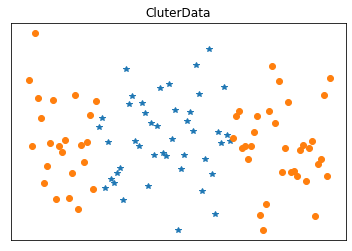

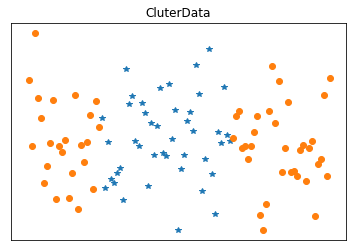

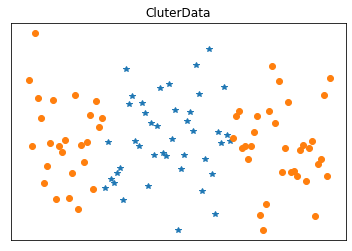

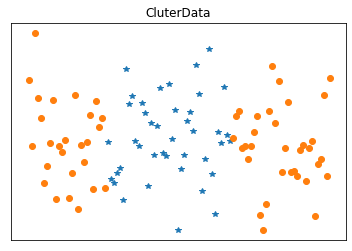

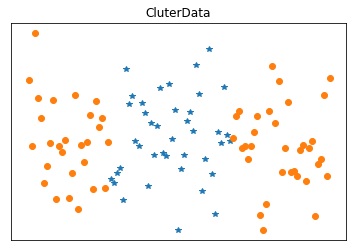

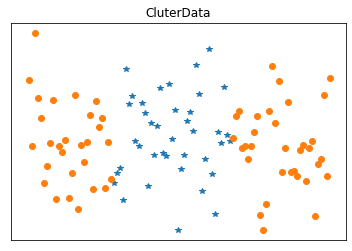

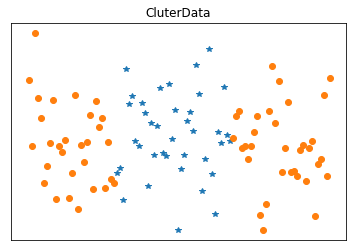

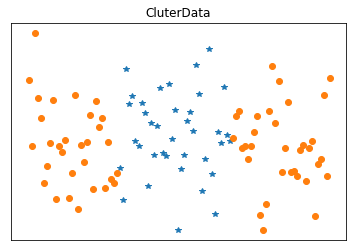

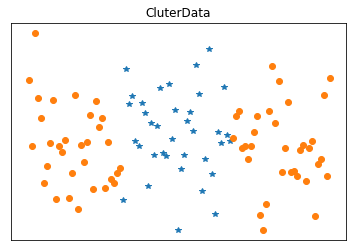

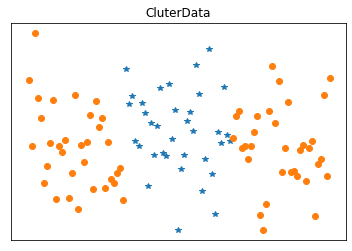

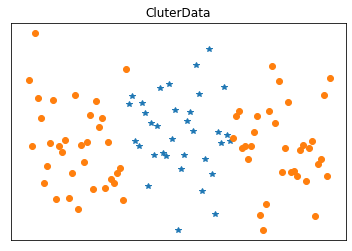

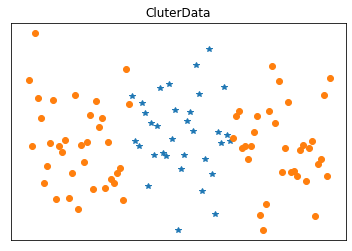

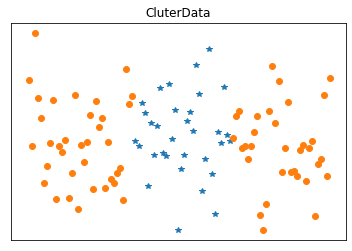

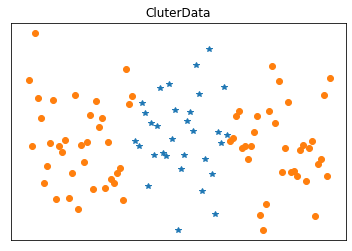

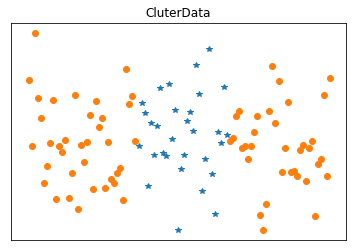

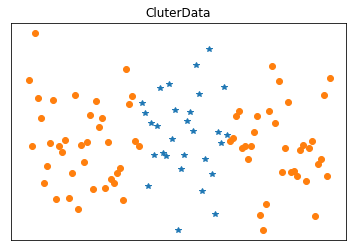

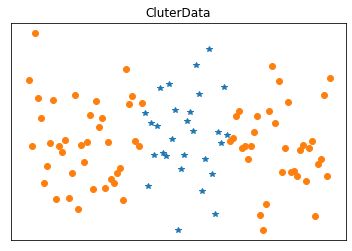

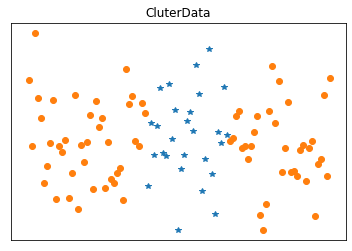

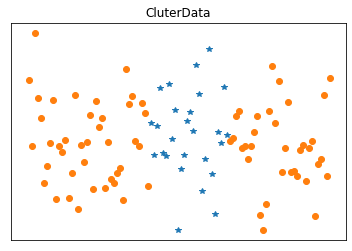

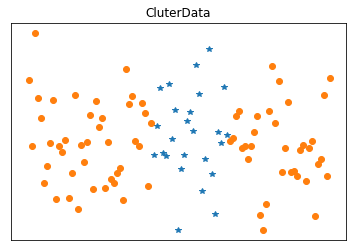

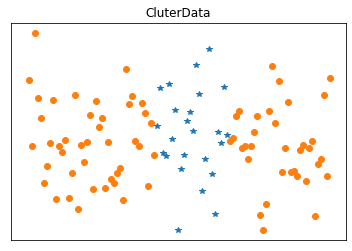

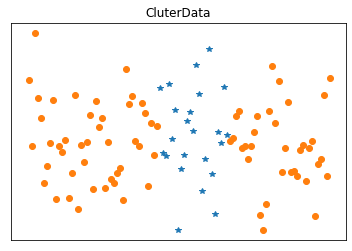

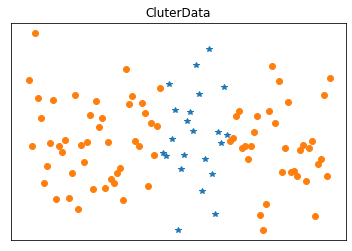

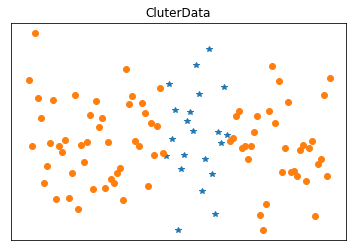

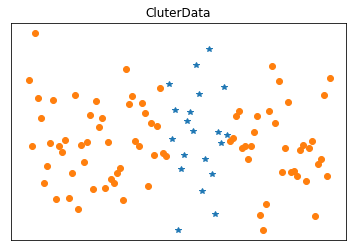

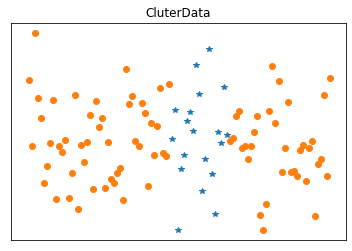

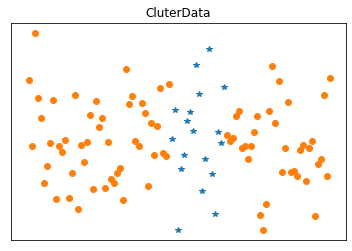

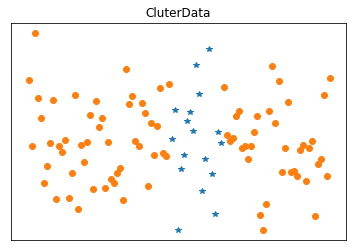

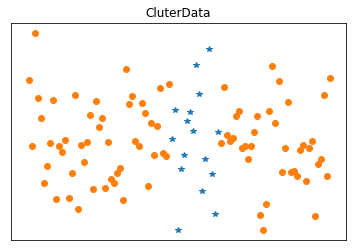

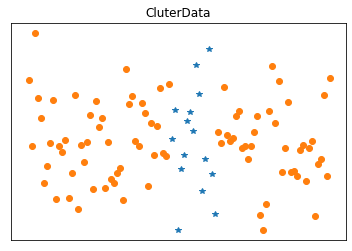

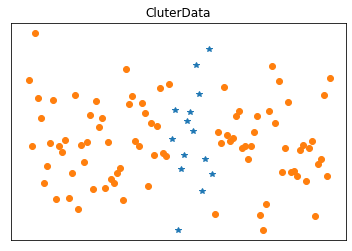

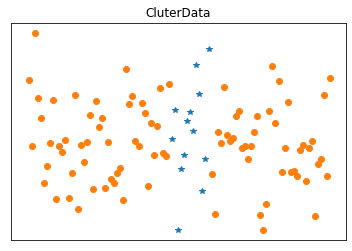

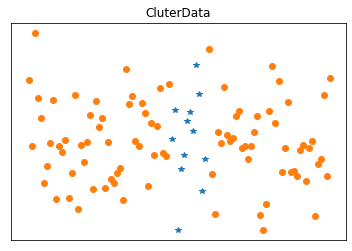

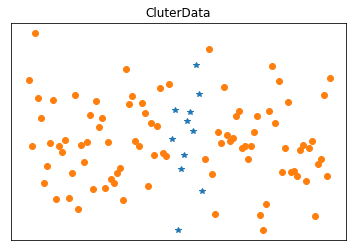

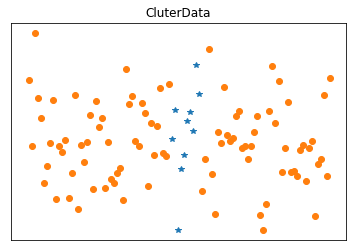

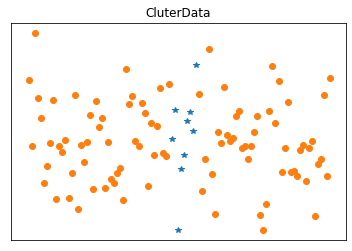

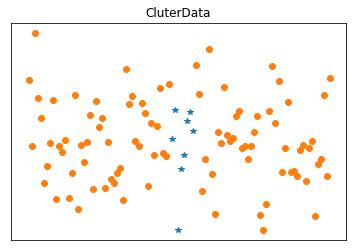

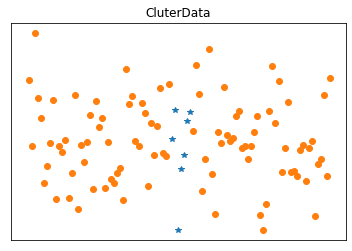

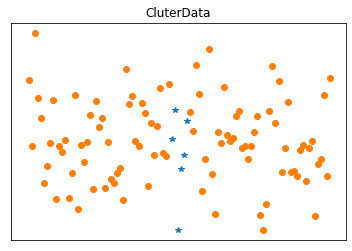

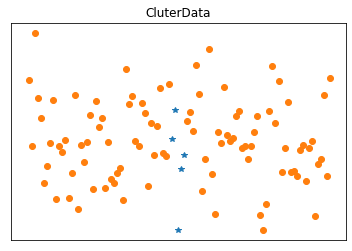

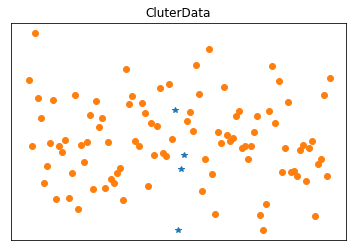

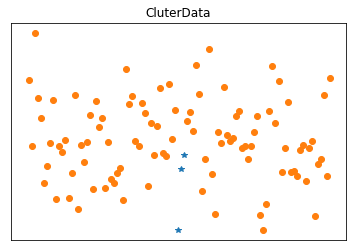

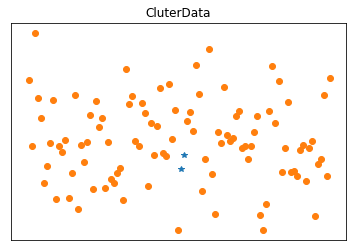

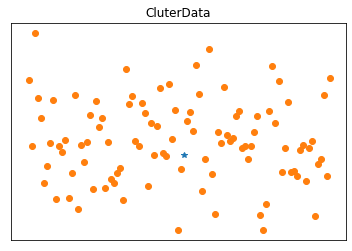

C:\Users\YGW\anaconda3\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\YGW\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


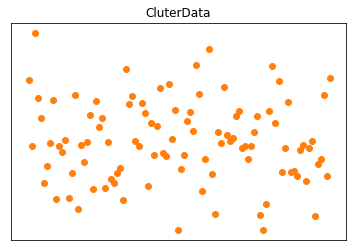

In [3]:
# 每个红色点都代表一个种类
while True:
    if len(data[0])==0:break
    data,otherClass,center=spilt(data,center)
    OtherClass[0].append(otherClass[0])
    OtherClass[1].append(otherClass[1])
    plt.plot(data[0],data[1],'*')
    plt.plot(OtherClass[0],OtherClass[1],'o','r')
    plt.yticks([])
    plt.xticks([])
    plt.title("CluterData")
    plt.show()

#### K均值聚类

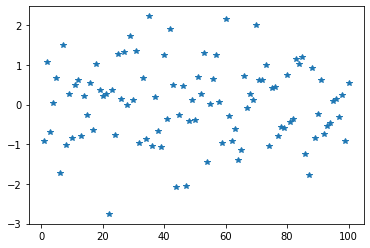

In [38]:
# 1.首先初始化确定k值与K所在位置
### 首先利用聚合聚类来确定K的簇
plt.plot(xdata,ydata,'*')
plt.show()

In [4]:
# 首先计算距离矩阵
D = [] 
for i in range(xdata.shape[0]):
    D.append(np.sqrt((xdata[i]-xdata)**2+(ydata[i]-ydata)**2))
D = np.array(D)
D[D==0]=10e10
D.shape

(100, 100)

In [6]:
# 寻找距离最小的两点
Dij = np.argmin(D)
index = [Dij//D.shape[0],Dij%D.shape[1]]
index

[86, 87]

In [7]:
## 找出最相近的8个类别点作为中心簇点
allClass = []
while True:
    if len(allClass)==8: break ##若找到8个类就退出
    Dij=np.argmin(D)#找出最小距离的索引
    index=[Dij//D.shape[0],Dij%D.shape[1]]
    addnewClass= True
    for Class in allClass:
        Class = list(set(Class))
#         if len(Class)>=10:break
        if np.in1d(np.array(index),np.array(Class)).any():
            Class+=index
            D[index[0]][index[1]]=10e10
            D[index[1]][index[0]]=10e10
            addnewClass=False
        else:
            addnewClass=True
    if addnewClass==True:
        newClass = index
        allClass.append(newClass)
        D[index[0]][index[1]]=10e10
        D[index[1]][index[0]]=10e10       

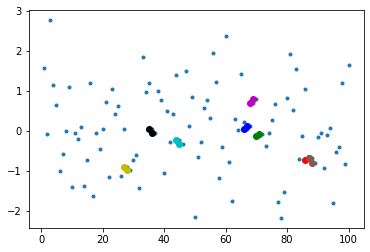

In [9]:
allClass ## 获得8个中心点
color = ['r','g','b','y','c','m','k','tab:brown']
#绘制8个中心点簇
plt.plot(xdata,ydata,'.')
for i in range(len(allClass)):
    ClassIndex=allClass[i]
    for x in ClassIndex:
        plt.plot(x,ydata[x],'o',color=color[i])
plt.show()

In [10]:
## 进行K均值聚类
allClass ## 暂时的类别数
ClassMean=[]
Xmean = np.mean(allClass,axis=1)
Ymean_ = []
for index in allClass:
    Ymean_.append(np.mean([ydata[index[0]],ydata[index[1]]]))
Ymean = np.array(Ymean_)
Xmean,Ymean

(array([86.5, 70.5, 66.5, 27.5, 44.5, 68.5, 35.5, 87.5]),
 array([-0.70919142, -0.09214192,  0.0878757 , -0.94498834, -0.27914901,
         0.74525262, -0.00550056, -0.74948101]))

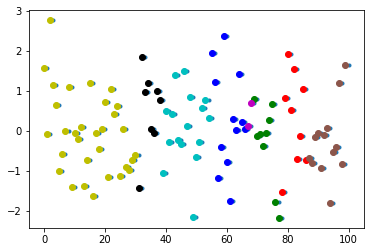

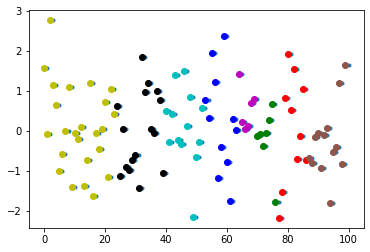

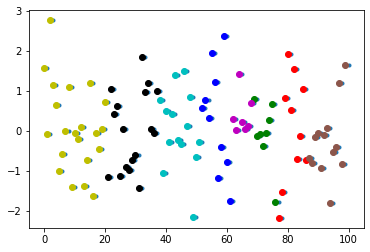

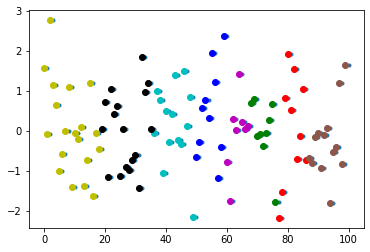

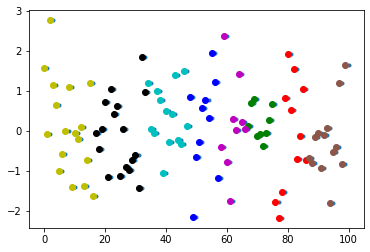

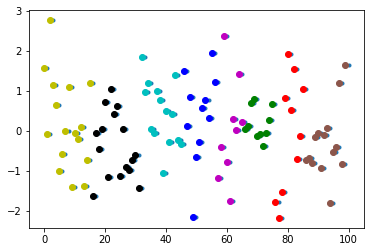

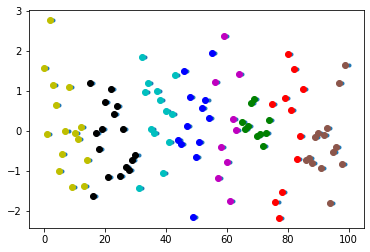

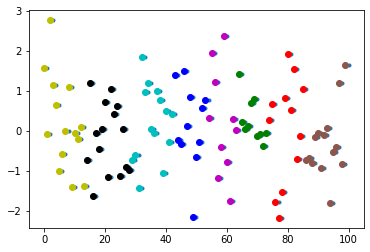

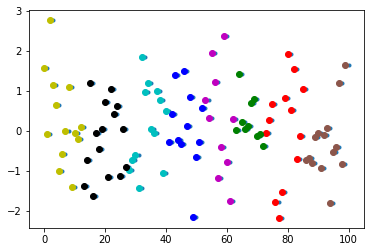

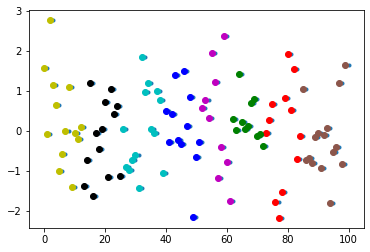

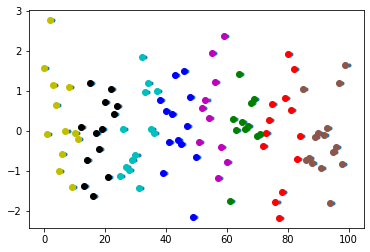

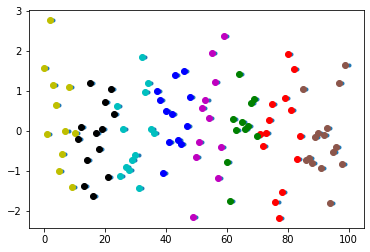

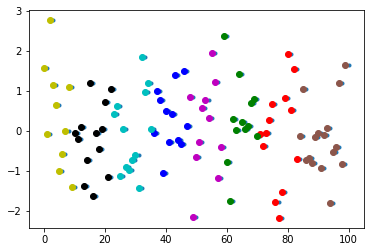

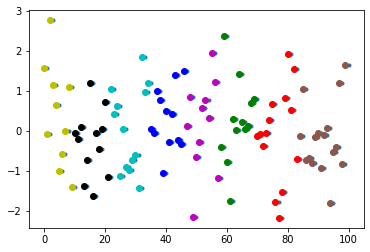

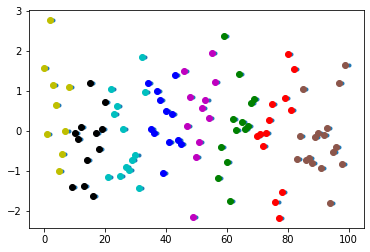

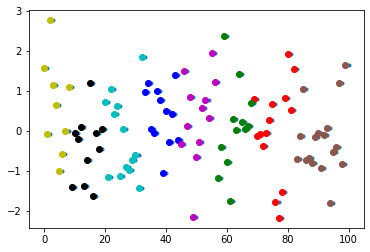

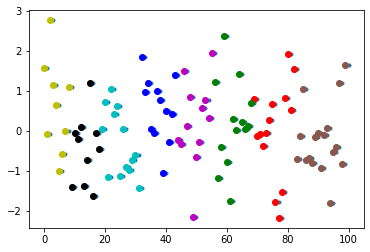

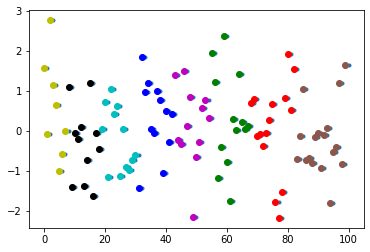

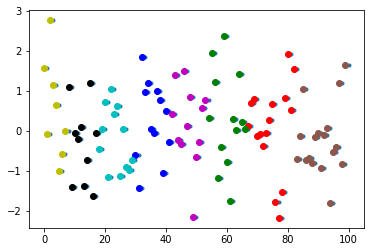

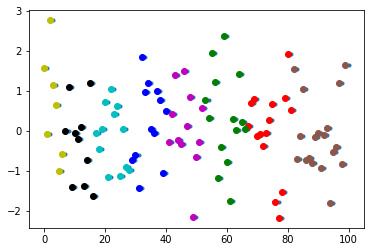

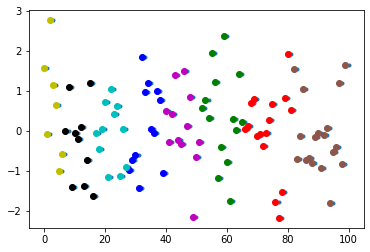

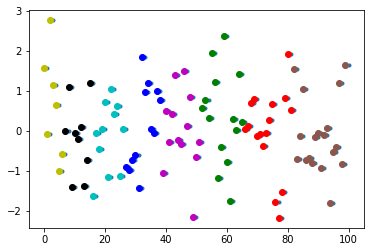

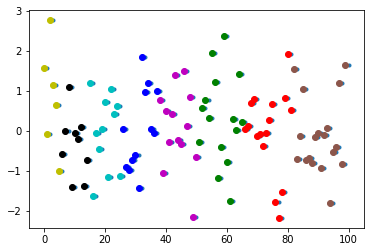

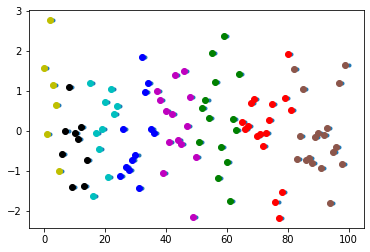

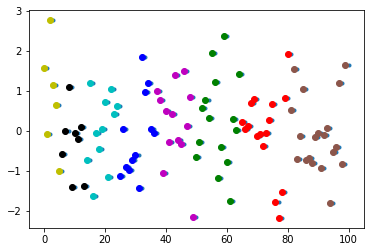

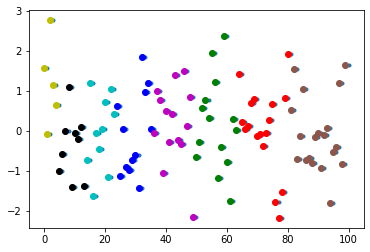

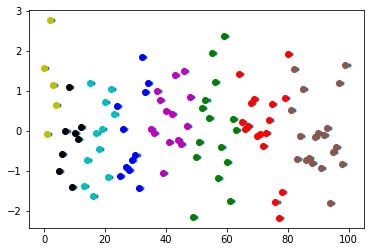

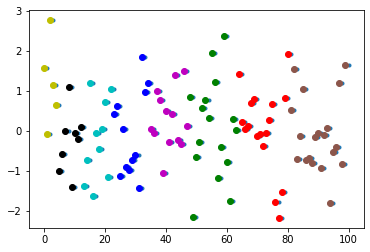

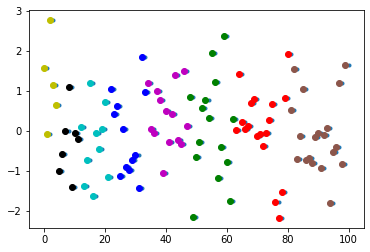

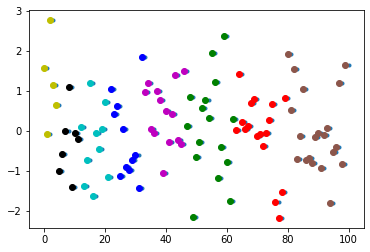

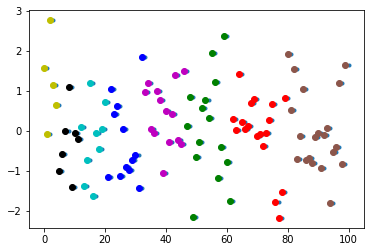

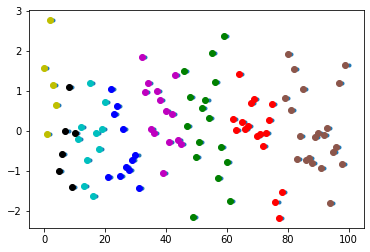

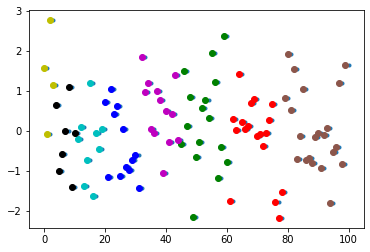

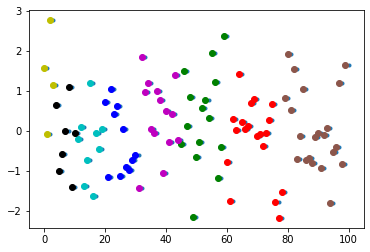

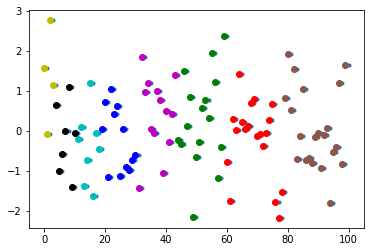

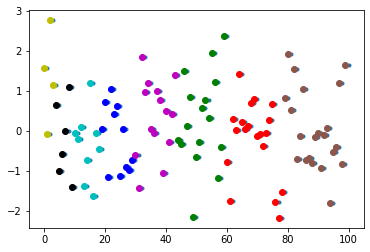

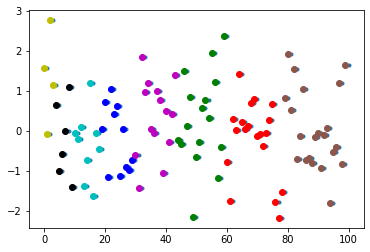

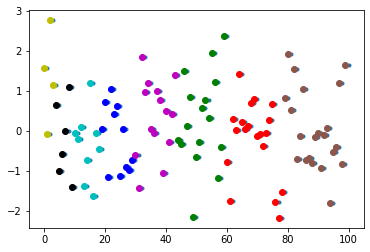

C:\Users\YGW\AppData\Local\Temp/ipykernel_13872/2390415445.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  oldClassArr = np.array(oldClass)
C:\Users\YGW\AppData\Local\Temp/ipykernel_13872/2390415445.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  newClassArr = np.array(newClass)


In [11]:
oldClass = allClass
xdata=xdata.reshape(-1,1)
ydata=ydata.reshape(-1,1)
color = ['r','g','b','y','c','m','k','tab:brown']
while True:
    newClass = [[] for i in range(len(oldClass))]
    D=np.sqrt((xdata-Xmean)**2+(ydata-Ymean)**2) # 将每个样本点与8个中心点簇进行距离运算
    ij = np.argmin(D,axis=1)
    for index,i in enumerate(ij.tolist()):
        newClass[i]+=[index]
    
    plt.plot(xdata,ydata,'.')
    for i in range(len(newClass)):
        ClassIndex=newClass[i]
        for x in ClassIndex:
            plt.plot(x,ydata[x],'o',color=color[i])
    plt.show()
    
    if newClass==oldClass:
        break
    else:
        oldClass=newClass
        Xmean,Ymean=[],[]
        for index in newClass:
            Xmean.append(np.mean(index))
            Ymean.append(np.mean(ydata[index]))
        Xmean=np.array(Xmean)
        Ymean=np.array(Ymean)
plt.plot(xdata,ydata,'.')
for i in range(len(newClass)):
    ClassIndex=oldClass[i]
    for x in ClassIndex:
        plt.plot(x,ydata[x],'o',color=color[i])
plt.show()
oldClassArr = np.array(oldClass)
newClassArr = np.array(newClass)